In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Email spam Detection with Machine Learning/spam.csv', encoding='ISO-8859-1')


In [ ]:
df.head(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.size

27860

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
df.sample(4)

,v1,v2
448,ham,LOL ... Have you made plans for new years?
276,ham,Tell rob to mack his gf in the theater
523,ham,"That's very rude, you on campus?"
2934,ham,"Yeah, we got one lined up for us"


In [ ]:
df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)

In [ ]:
df.sample(4)

,Target,Text
3409,ham,Joy's father is John. Then John is the ____ of...
4806,spam,PRIVATE! Your 2004 Account Statement for 07849...
1045,ham,"Come round, it's ."
1474,ham,"Friendship is not a game to play, It is not a ..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['Target'] = encoder.fit_transform(df['Target'])

In [ ]:
df.head(4)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [ ]:
df.isnull().sum()

,0
Target,0
Text,0


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.head(6)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
df['Target'].value_counts()

,count
Target,
0,4516
1,653


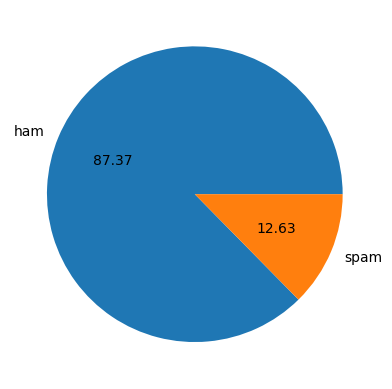

In [ ]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['Text'].apply(len)

,Text
0,111
1,29
2,155
3,49
4,61
...,...
5567,161
5568,37
5569,57
5570,125


In [ ]:
df['num_characters'] = df['Text'].apply(len)

In [ ]:
df.head(4)

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [ ]:
import re
df['tokens'] = df['Text'].apply(lambda x: re.findall(r'\b\w+\b', x))




In [ ]:
df['tokens'] = df['Text'].apply(lambda x: x.split())


In [ ]:
import re
df['Text'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))


,Text
0,20
1,6
2,33
3,11
4,14
...,...
5567,33
5568,8
5569,10
5570,27


In [ ]:
import re
df['num_words'] = df['Text'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))


In [ ]:
df.head(4)

,Target,Text,num_characters,tokens,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...",20
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, u, oni...]",6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",33
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor..., U, c, already...",11


In [ ]:
import nltk

# Remove corrupted or misconfigured punkt if it exists
import shutil
shutil.rmtree('/root/nltk_data/tokenizers/punkt', ignore_errors=True)

# Force download the correct 'punkt' tokenizer
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re

# Split text into sentences based on punctuation followed by a space
df['num_sentences'] = df['Text'].apply(lambda x: re.split(r'(?<=[.!?])\s+', x))



In [ ]:
import re
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words
count,5169.000000,5169.000000
mean,78.977945,15.989940
std,58.236293,11.518372
min,2.000000,0.000000
25%,36.000000,8.000000
50%,60.000000,12.000000
75%,117.000000,23.000000
max,910.000000,190.000000


In [ ]:
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words
count,653.000000,653.000000
mean,137.891271,25.595712
std,30.137753,6.185684
min,13.000000,2.000000
25%,132.000000,24.000000
50%,149.000000,27.000000
75%,157.000000,29.000000
max,224.000000,40.000000


<Axes: xlabel='num_characters', ylabel='Count'>

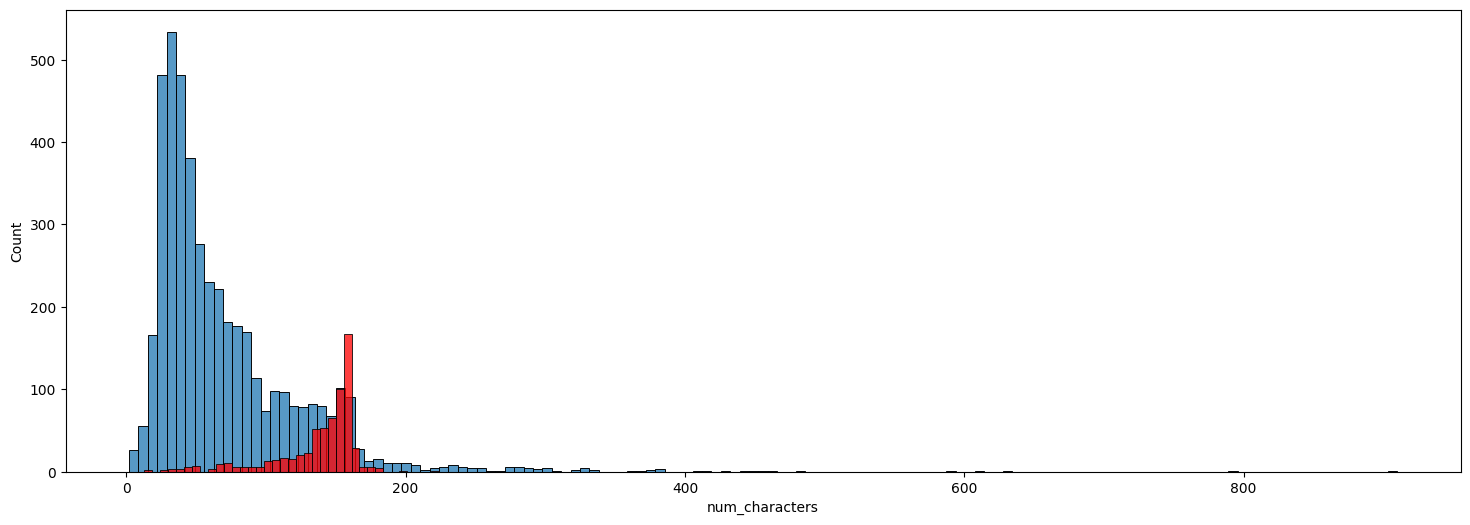

In [ ]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'], color='red')

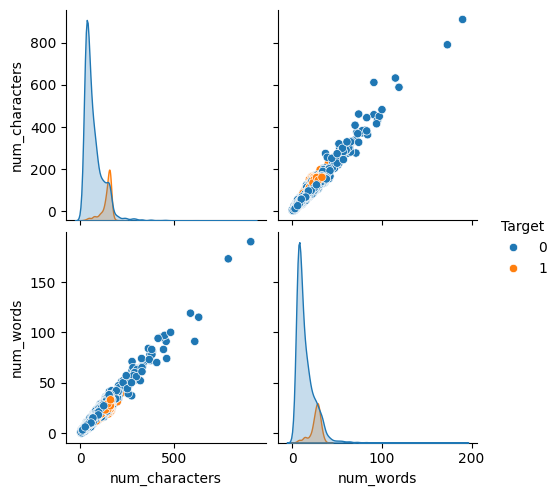

In [ ]:
sns.pairplot(df, hue='Target')

In [ ]:
import re

# Create numeric features
df['num_sentences'] = df['Text'].apply(lambda x: len(re.split(r'(?<=[.!?])\s+', str(x))))
df['num_words'] = df['Text'].apply(lambda x: len(str(x).split()))

# Now compute correlation
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
print(corr_matrix)


                  Target  num_characters  num_words  num_sentences
Target          1.000000        0.384717   0.286576       0.239683
num_characters  0.384717        1.000000   0.973667       0.629596
num_words       0.286576        0.973667   1.000000       0.632944
num_sentences   0.239683        0.629596   0.632944       1.000000


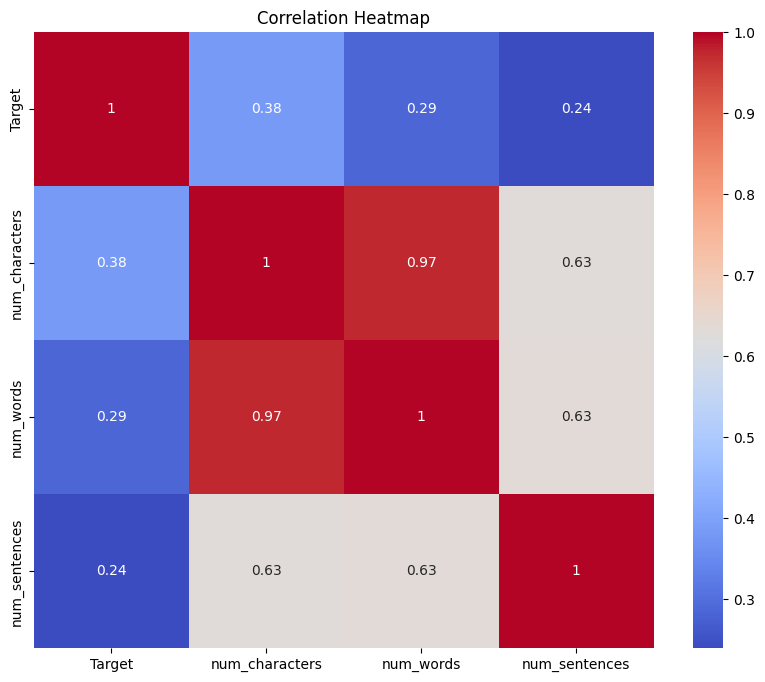

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only before correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix on numeric columns
corr_matrix = numeric_df.corr()

# Plot heatmap on the numeric correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
def transform_text1(text1):
  text1 = text1.lower()
  return text1

In [ ]:
transform_text1('HI how Are You')

'hi how are you'

In [ ]:
def transform_text2(text2):
  text2 = nltk.word_tokenize(text2)
  return text2

In [ ]:
import re

def transform_text2(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and non-alphabet characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize by splitting on whitespace
    tokens = text.split()

    return tokens


In [ ]:
def transform_text3(text3):
  y=[]
  for i in text3:
    if i.isalnum():
      y.append(i)
  return y

In [ ]:
transform_text3('HI how Are % @ 20 45* You')

['H', 'I', 'h', 'o', 'w', 'A', 'r', 'e', '2', '0', '4', '5', 'Y', 'o', 'u']

In [ ]:
def transform_text3a(text3a):
  text3a = text3a.lower()
  text3a = nltk.word_tokenize(text3a)
  y_a=[]
  for i in text3a:
    if i.isalnum():
      y_a.append(i)
  return y_a

In [ ]:
import re

def transform_text3a(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize by splitting on spaces
    tokens = text.split()

    return tokens


In [ ]:
transform_text3a('HI how Are % @ 20 45* You')



['hi', 'how', 'are', 'you']

In [ ]:
# Custom list of English stopwords (similar to NLTK's list)
custom_stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
    'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him',
    'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its',
    'itself', 'they', 'them', 'their', 'theirs', 'themselves',
    'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those',
    'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have',
    'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
    'between', 'into', 'through', 'during', 'before', 'after',
    'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on',
    'off', 'over', 'under', 'again', 'further', 'then', 'once',
    'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
    'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',
    'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
}


In [ ]:
def remove_stopwords(tokens):
    return [word for word in tokens if word not in custom_stopwords]


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def transform_text4(text4):
  text4 = text4.lower()
  text4 = nltk.word_tokenize(text4)
  y_4=[]
  for i in text4:
    if i.isalnum():
      y_4.append(i)
  text4 = y_4[:]
  y_4.clear()
  for i in text4:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y_4.append(i)
  return y_4


In [ ]:
import re

# Minimal English stopwords (replace or expand as needed)
custom_stopwords = {
    'i','me','my','myself','we','our','you','your','yours','he','him','his','she','her',
    'it','its','they','them','their','theirs','what','which','who','this','that','these',
    'am','is','are','was','were','be','been','being','have','has','had','do','does','did',
    'a','an','the','and','but','if','or','because','as','until','while','of','at','by',
    'for','with','about','between','into','through','during','before','after','above',
    'to','from','up','down','in','out','on','off','over','under','again','further','then',
    'once','here','there','when','where','why','how','all','any','both','each','few',
    'more','most','other','some','such','no','nor','not','only','own','same','so','than',
    'too','very','s','t','can','will','just','don','should','now'
}

def transform_text4(text):
    text = text.lower()                                # lowercase
    text = re.sub(r'[^a-z\s]', '', text)               # remove special chars & digits
    words = text.split()                               # basic tokenization
    filtered = [word for word in words if word not in custom_stopwords]  # remove stopwords
    return ' '.join(filtered)

# Example
print(transform_text4('HI how are % @ 20 45* you Mrinal?'))


hi mrinal


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
def transform_text5(text5):
  text5 = text5.lower()
  text5 = nltk.word_tokenize(text5)
  y_5=[]
  for i in text5:
    if i.isalnum():
      y_5.append(i)
  text5 = y_5[:]
  y_5.clear()
  for i in text5:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y_5.append(i)
  text5 = y_5[:]
  y_5.clear()
  for i in text5:
    y_5.append(ps.stem(i))
  return " ".join(y_5)


In [ ]:
import re

# Basic stopword list (you can expand this)
stopwords = {
    'i','me','my','myself','we','our','you','your','yours','he','him','his','she','her',
    'it','its','they','them','their','theirs','what','which','who','this','that','these',
    'am','is','are','was','were','be','been','being','have','has','had','do','does','did',
    'a','an','the','and','but','if','or','because','as','until','while','of','at','by',
    'for','with','about','between','into','through','during','before','after','above',
    'to','from','up','down','in','out','on','off','over','under','again','further','then',
    'once','here','there','when','where','why','how','all','any','both','each','few',
    'more','most','other','some','such','no','nor','not','only','own','same','so','than',
    'too','very','can','will','just','don','should','now'
}

def transform_text5(text5):
    text5 = text5.lower()  # lowercase
    text5 = re.sub(r'[^a-z\s]', '', text5)  # remove punctuation and numbers
    tokens = text5.split()  # basic tokenization
    filtered_tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(filtered_tokens)

# Example usage
print(transform_text5('I loved the YT lectures of Machine Learning. How about you?'))


loved yt lectures machine learning


In [9]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Email spam Detection with Machine Learning/spam.csv', encoding='latin1')
df.columns = ['Target', 'Text', 'Unnamed1', 'Unnamed2', 'Unnamed3']
df = df[['Target', 'Text']]

print(df['Text'][200])


I sent you  &lt;#&gt;  bucks


In [10]:
transform_text5('But i ll b going 2 sch on mon. My sis need 2 take smth')

'll b going sch mon sis need take smth'

In [11]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)


In [16]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Email spam Detection with Machine Learning/spam.csv', encoding='latin1')
df.columns = ['Target', 'Text', 'Unnamed1', 'Unnamed2', 'Unnamed3']
df = df[['Target', 'Text']]

# Alternative text transformation function (no nltk)
def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    words = text.split()  # Simple split by spaces
    return " ".join(words)

# Apply transformation
df['transformed_text'] = df['Text'].apply(transform_text)

# Display result
print(df[['Text', 'transformed_text']].head())


                                                Text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                    transformed_text  
0  go until jurong point crazy available only in ...  
1                            ok lar joking wif u oni  
2  free entry in a wkly comp to win fa cup final ...  
3        u dun say so early hor u c already then say  
4  nah i dont think he goes to usf he lives aroun...  


In [17]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [18]:
df.head(4)

,Target,Text,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say


In [19]:
!pip install wordcloud

In [20]:
from wordcloud import WordCloud
from PIL import Image, ImageDraw, ImageFont
wc = WordCloud(width=800, height=800, min_font_size=10, background_color='white')

In [21]:
df['Target']==1

,Target
0,False
1,False
2,False
3,False
4,False
...,...
5567,False
5568,False
5569,False
5570,False


In [22]:
df[df['Target']==1]

,Target,Text,transformed_text


In [24]:
df['transformed_text'] = df['Text'].apply(transform_text)


In [25]:
df[df['Target'] == 1]['transformed_text'].str.cat(sep=' ')


''

In [27]:
df['transformed_text'] = df['Text'].apply(transform_text)


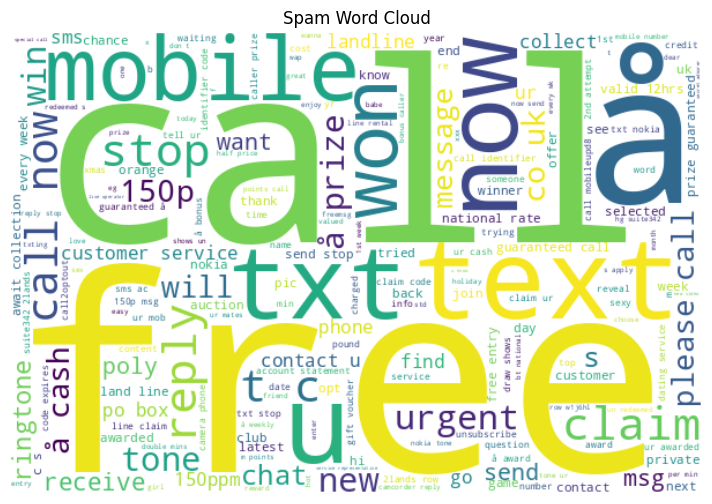

In [30]:
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Email spam Detection with Machine Learning/spam.csv', encoding='latin1')

# Keep necessary columns and rename
df = df[['v1', 'v2']]
df.columns = ['Target', 'Text']

# Convert labels to binary
df['Target'] = df['Target'].map({'ham': 0, 'spam': 1})

# Use RegexpTokenizer instead of word_tokenize
tokenizer = RegexpTokenizer(r'\w+')

def transform_text(text):
    text = text.lower()
    words = tokenizer.tokenize(text)
    return " ".join(words)

# Apply transformation
df['transformed_text'] = df['Text'].apply(transform_text)

# Generate and display WordCloud for spam
spam_text = " ".join(df[df['Target'] == 1]['transformed_text'])
wc = WordCloud(width=600, height=400, background_color='white').generate(spam_text)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Spam Word Cloud")
plt.show()


In [32]:
# Join spam messages
spam_text = " ".join(df[df['Target'] == 1]['transformed_text'])

# Generate word cloud
spam_wc = wc.generate(spam_text)


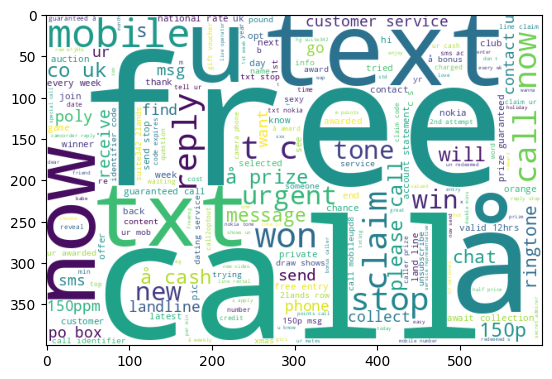

In [33]:
plt.imshow(spam_wc)

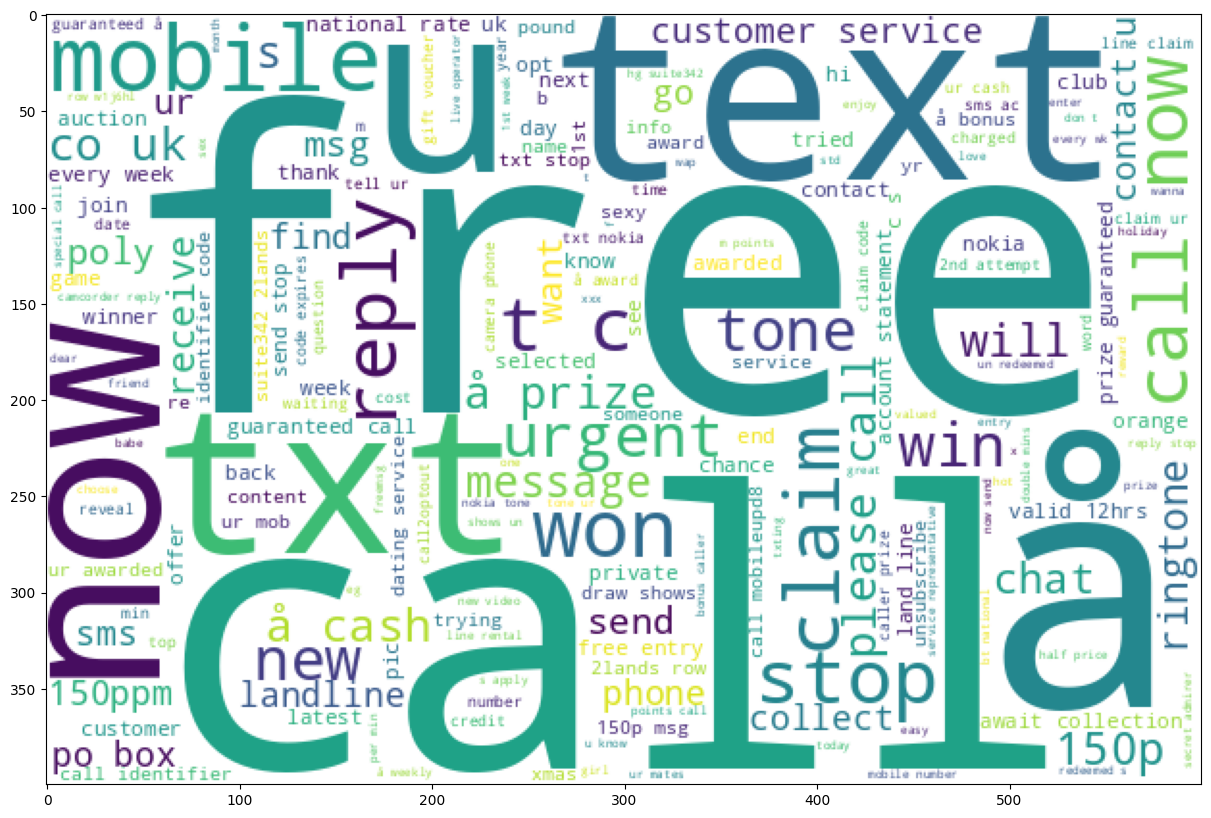

In [34]:
plt.figure(figsize=(18,10))
plt.imshow(spam_wc)

In [35]:
ham_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=' '))

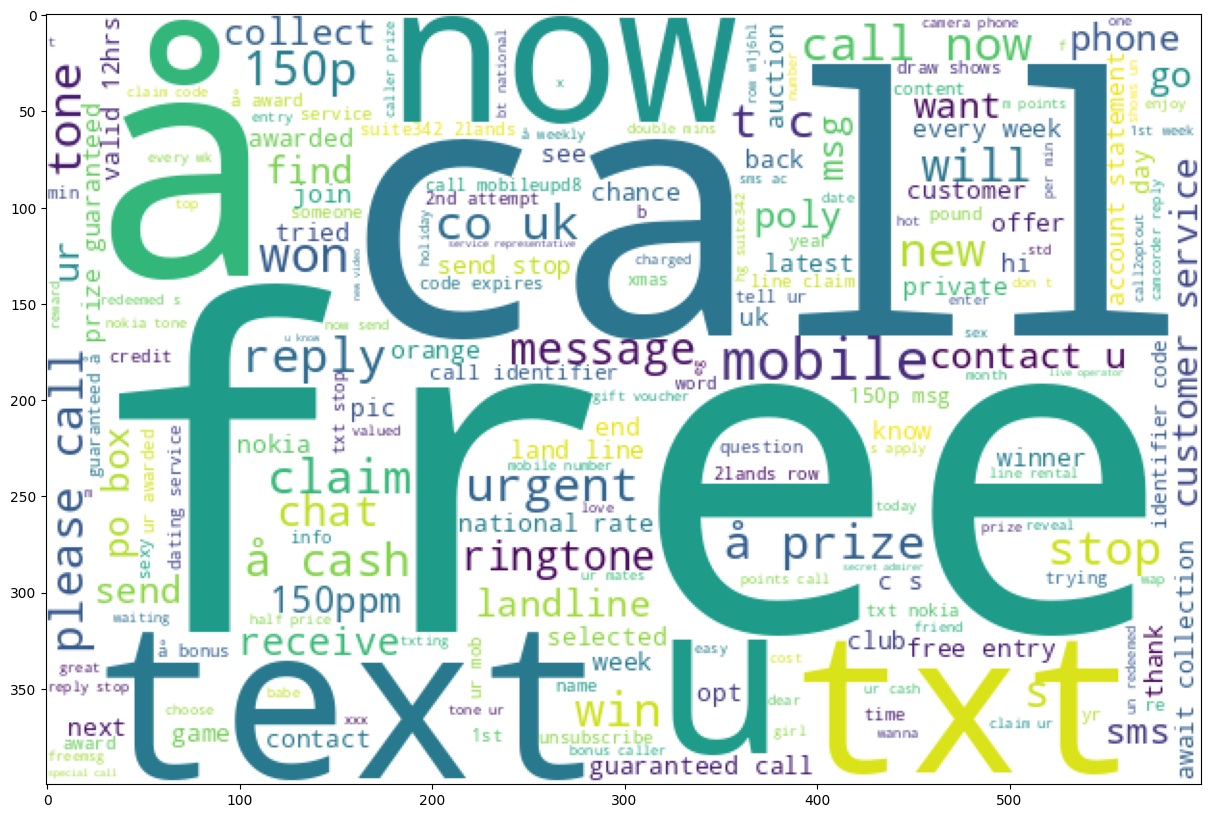

In [36]:
plt.figure(figsize=(18,10))
plt.imshow(ham_wc)

In [37]:
df.head(5)

,Target,Text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...


In [38]:
df[df['Target'] == 1]['transformed_text']

,transformed_text
2,free entry in 2 a wkly comp to win fa cup fina...
5,freemsg hey there darling it s been 3 week s n...
8,winner as a valued network customer you have b...
9,had your mobile 11 months or more u r entitled...
11,six chances to win cash from 100 to 20 000 pou...
...,...
5537,want explicit sex in 30 secs ring 02073162414 ...
5540,asked 3mobile if 0870 chatlines inclu in free ...
5547,had your contract mobile 11 mnths latest motor...
5566,reminder from o2 to get 2 50 pounds free call ...


In [39]:
df[df['Target'] == 1]['transformed_text'].tolist

<bound method IndexOpsMixin.tolist of 2       free entry in 2 a wkly comp to win fa cup fina...
5       freemsg hey there darling it s been 3 week s n...
8       winner as a valued network customer you have b...
9       had your mobile 11 months or more u r entitled...
11      six chances to win cash from 100 to 20 000 pou...
                              ...                        
5537    want explicit sex in 30 secs ring 02073162414 ...
5540    asked 3mobile if 0870 chatlines inclu in free ...
5547    had your contract mobile 11 mnths latest motor...
5566    reminder from o2 to get 2 50 pounds free call ...
5567    this is the 2nd time we have tried 2 contact u...
Name: transformed_text, Length: 747, dtype: object>

In [40]:
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
  print(msg.split())

['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', '08452810075over18', 's']
['freemsg', 'hey', 'there', 'darling', 'it', 's', 'been', '3', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'i', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'å', '1', '50', 'to', 'rcv']
['winner', 'as', 'a', 'valued', 'network', 'customer', 'you', 'have', 'been', 'selected', 'to', 'receivea', 'å', '900', 'prize', 'reward', 'to', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hours', 'only']
['had', 'your', 'mobile', '11', 'months', 'or', 'more', 'u', 'r', 'entitled', 'to', 'update', 'to', 'the', 'latest', 'colour', 'mobiles', 'with', 'camera', 'for', 'free', 'call', 'the', 'mobile', 'update', 'co', 'free', 'on', '08002986030']
['six', 'cha

In [41]:
spam_corpus=[]
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [42]:
spam_corpus

['free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 's',
 'apply',
 '08452810075over18',
 's',
 'freemsg',
 'hey',
 'there',
 'darling',
 'it',
 's',
 'been',
 '3',
 'week',
 's',
 'now',
 'and',
 'no',
 'word',
 'back',
 'i',
 'd',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'to',
 'send',
 'å',
 '1',
 '50',
 'to',
 'rcv',
 'winner',
 'as',
 'a',
 'valued',
 'network',
 'customer',
 'you',
 'have',
 'been',
 'selected',
 'to',
 'receivea',
 'å',
 '900',
 'prize',
 'reward',
 'to',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hours',
 'only',
 'had',
 'your',
 'mobile',
 '11',
 'months',
 'or',
 'more',
 'u',
 'r',
 'entitled',
 'to',
 'update',
 'to',
 'the',
 'latest',
 'colour',
 'mobiles',
 'wit

In [45]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 224,
         'entry': 26,
         'in': 80,
         '2': 206,
         'a': 377,
         'wkly': 14,
         'comp': 10,
         'to': 688,
         'win': 64,
         'fa': 4,
         'cup': 5,
         'final': 16,
         'tkts': 4,
         '21st': 2,
         'may': 7,
         '2005': 3,
         'text': 125,
         '87121': 4,
         'receive': 33,
         'question': 7,
         'std': 11,
         'txt': 163,
         'rate': 30,
         't': 92,
         'c': 56,
         's': 90,
         'apply': 30,
         '08452810075over18': 2,
         'freemsg': 14,
         'hey': 5,
         'there': 16,
         'darling': 2,
         'it': 33,
         'been': 43,
         '3': 45,
         'week': 60,
         'now': 199,
         'and': 122,
         'no': 69,
         'word': 25,
         'back': 23,
         'i': 61,
         'd': 6,
         'like': 13,
         'some': 6,
         'fun': 9,
         'you': 297,
         'up': 21,
         'fo

In [46]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('to', 688),
 ('a', 377),
 ('call', 355),
 ('å', 299),
 ('you', 297),
 ('your', 264),
 ('free', 224),
 ('2', 206),
 ('the', 206),
 ('for', 203),
 ('now', 199),
 ('or', 188),
 ('u', 174),
 ('txt', 163),
 ('is', 158),
 ('on', 144),
 ('ur', 144),
 ('4', 137),
 ('have', 135),
 ('from', 131),
 ('mobile', 127),
 ('text', 125),
 ('and', 122),
 ('stop', 121),
 ('claim', 113),
 ('1', 111),
 ('with', 109),
 ('reply', 104),
 ('www', 98),
 ('of', 95)]

In [47]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,to,688
1,a,377
2,call,355
3,å,299
4,you,297
5,your,264
6,free,224
7,2,206
8,the,206
9,for,203


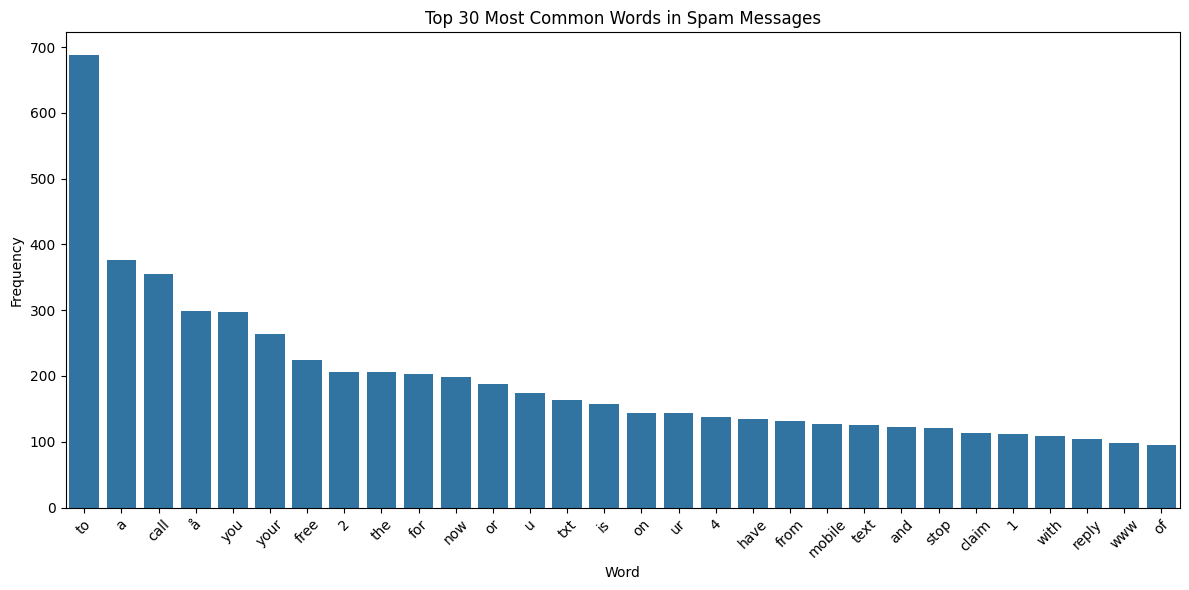

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Make sure you already have spam_corpus defined, e.g.:
# spam_corpus = " ".join(df[df['Target'] == 1]['transformed_text']).split()

# Get top 30 most common words
top_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Plot using Seaborn
plt.figure(figsize=(12,6))
sns.barplot(x='Word', y='Frequency', data=top_spam_words)
plt.xticks(rotation=45)
plt.title("Top 30 Most Common Words in Spam Messages")
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Email spam Detection with Machine Learning/spam.csv', encoding='latin1')[['v1', 'v2']]
df.columns = ['Target', 'Text']

# Convert target labels to binary
df['Target'] = df['Target'].map({'ham': 0, 'spam': 1})

# Text transformation function (without nltk)
def transform_text(text):
    text = text.lower()
    # Use regex to keep only words (no punctuation or symbols)
    words = re.findall(r'\b\w+\b', text)
    return " ".join(words)

# Apply the transformation
df['transformed_text'] = df['Text'].apply(transform_text)

# Build the ham_corpus (for non-spam messages)
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text']:
    for word in msg.split():
        ham_corpus.append(word)

# Optional: print a sample
print("Sample words from ham_corpus:", ham_corpus[:20])


Sample words from ham_corpus: ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']


In [6]:
ham_corpus

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'so',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'then',
 'say',
 'nah',
 'i',
 'don',
 't',
 'think',
 'he',
 'goes',
 'to',
 'usf',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'even',
 'my',
 'brother',
 'is',
 'not',
 'like',
 'to',
 'speak',
 'with',
 'me',
 'they',
 'treat',
 'me',
 'like',
 'aids',
 'patent',
 'as',
 'per',
 'your',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'has',
 'been',
 'set',
 'as',
 'your',
 'callertune',
 'for',
 'all',
 'callers',
 'press',
 '9',
 'to',
 'copy',
 'your',
 'friends',
 'callertune',
 'i',
 'm',
 'gonna',
 'be',
 'home',
 'soon',
 'and',
 'i',
 'don',
 't',
 'want',
 'to',
 'talk',
 'about',
 'this',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'i',


In [7]:
len(ham_corpus)

70817

In [8]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('i', 2940),
 ('you', 1943),
 ('to', 1554),
 ('the', 1122),
 ('a', 1056),
 ('u', 1018),
 ('and', 857),
 ('in', 818),
 ('me', 772),
 ('my', 750),
 ('is', 732),
 ('it', 711),
 ('that', 551),
 ('of', 525),
 ('for', 501),
 ('s', 478),
 ('have', 440),
 ('can', 439),
 ('so', 435),
 ('but', 434),
 ('your', 417),
 ('not', 415),
 ('are', 414),
 ('m', 405),
 ('on', 393),
 ('do', 384),
 ('at', 378),
 ('t', 375),
 ('if', 354),
 ('we', 354)]

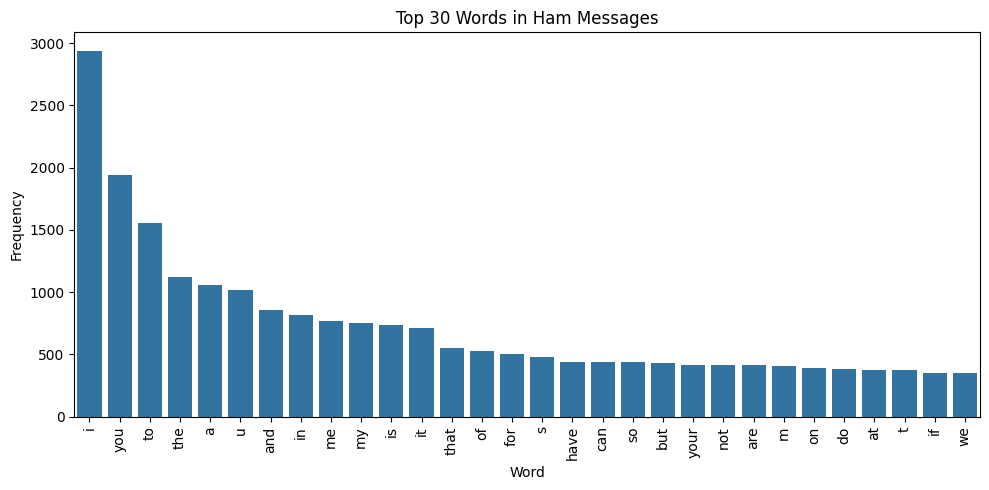

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Count the most common 30 words
ham_word_counts = Counter(ham_corpus).most_common(30)

# Convert to DataFrame for seaborn
df_ham = pd.DataFrame(ham_word_counts, columns=['Word', 'Frequency'])

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='Word', y='Frequency', data=df_ham)
plt.xticks(rotation='vertical')
plt.title('Top 30 Words in Ham Messages')
plt.tight_layout()
plt.show()


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [13]:
print(df.columns)


Index(['Target', 'Text', 'transformed_text'], dtype='object')


In [14]:
x = cv.fit_transform(df['transformed_text']).toarray()


In [15]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
y = df['Target'].values

In [17]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [23]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()


In [24]:
mnb = MultinomialNB()

In [26]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()


In [27]:
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.8959641255605382
[[864  93]
 [ 23 135]]
0.5921052631578947


In [28]:
mnb.fit(x_train, y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9757847533632287
[[944  13]
 [ 14 144]]
0.9171974522292994


In [29]:
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9757847533632287
[[956   1]
 [ 26 132]]
0.9924812030075187


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [32]:
print(df.columns)


Index(['Target', 'Text', 'transformed_text'], dtype='object')


In [33]:
x_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()


In [34]:
x_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
x_tfidf.shape

(5572, 8672)

In [36]:
y_tfidf = df['Target'].values

In [37]:
y_tfidf

array([0, 0, 1, ..., 0, 0, 0])

In [38]:
y_tfidf.shape

(5572,)

In [39]:
from sklearn.model_selection import train_test_split
x_train_tfidf,  x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, y_tfidf, test_size=0.2, random_state=2)

In [40]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [43]:
gnb.fit(x_train_tfidf, y_train_tfidf)
y_pred_gnb_tfidf = gnb.predict(x_test_tfidf)

print(accuracy_score(y_test_tfidf, y_pred_gnb_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_gnb_tfidf))
print(precision_score(y_test_tfidf, y_pred_gnb_tfidf))



0.8914798206278027
[[865  92]
 [ 29 129]]
0.583710407239819


In [45]:
mnb.fit(x_train_tfidf, y_train_tfidf)
y_pred_mnb_tfidf = mnb.predict(x_test_tfidf)

print(accuracy_score(y_test_tfidf, y_pred_mnb_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_mnb_tfidf))
print(precision_score(y_test_tfidf, y_pred_mnb_tfidf))

0.9506726457399103
[[957   0]
 [ 55 103]]
1.0


In [46]:
bnb.fit(x_train_tfidf, y_train_tfidf)
y_pred_bnb_tfidf = bnb.predict(x_test_tfidf)

print(accuracy_score(y_test_tfidf, y_pred_bnb_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_bnb_tfidf))
print(precision_score(y_test_tfidf, y_pred_bnb_tfidf))

0.9757847533632287
[[956   1]
 [ 26 132]]
0.9924812030075187
